# # Dataiku us data census test
This US Census dataset contains detailed but anonymized information for approximately 300,000 people.
The archive contains 3 files: 
o A large learning .csv file
o Another test .csv file
o A metadata file describing the columns of the two above mentioned files (identical for both)
The first thing to observe on the medata file is that the features given don't match with the data. Then, I did not use any feature name in order to define column but just numbers (from 0 to 41)



# Data import and cleaning

In [1]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import time as t

In [2]:
# data import
train= pd.read_csv("us_census_full/census_income_learn.csv", delimiter=",", header=None, skipinitialspace=True)
test = pd.read_csv("us_census_full/census_income_test.csv", delimiter=",", header=None, skipinitialspace=True)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
0     199523 non-null int64
1     199523 non-null object
2     199523 non-null int64
3     199523 non-null int64
4     199523 non-null object
5     199523 non-null int64
6     199523 non-null object
7     199523 non-null object
8     199523 non-null object
9     199523 non-null object
10    199523 non-null object
11    198649 non-null object
12    199523 non-null object
13    199523 non-null object
14    199523 non-null object
15    199523 non-null object
16    199523 non-null int64
17    199523 non-null int64
18    199523 non-null int64
19    199523 non-null object
20    199523 non-null object
21    199523 non-null object
22    199523 non-null object
23    199523 non-null object
24    199523 non-null float64
25    199523 non-null object
26    199523 non-null object
27    199523 non-null object
28    199523 non-null object
29    199523 non-null object
30    199523 non-null int

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
0     99762 non-null int64
1     99762 non-null object
2     99762 non-null int64
3     99762 non-null int64
4     99762 non-null object
5     99762 non-null int64
6     99762 non-null object
7     99762 non-null object
8     99762 non-null object
9     99762 non-null object
10    99762 non-null object
11    99357 non-null object
12    99762 non-null object
13    99762 non-null object
14    99762 non-null object
15    99762 non-null object
16    99762 non-null int64
17    99762 non-null int64
18    99762 non-null int64
19    99762 non-null object
20    99762 non-null object
21    99762 non-null object
22    99762 non-null object
23    99762 non-null object
24    99762 non-null float64
25    99762 non-null object
26    99762 non-null object
27    99762 non-null object
28    99762 non-null object
29    99762 non-null object
30    99762 non-null int64
31    99762 non-null object
32

In [6]:
# Check missing value code and convert to NaNs
object_col = train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(train[col].value_counts(dropna=False)/train.shape[0],'\n')
    # Convert '?' to NaNs and remove the entries with NaN value
    train.loc[train[col]=='?', col] = np.nan
    test.loc[test[col]=='?', col] = np.nan
    train.loc[train[col]=='Not in universe', col] = np.nan
    test.loc[test[col]=='Not in universe', col] = np.nan 

Not in universe                   0.502423
Private                           0.361001
Self-employed-not incorporated    0.042326
Local government                  0.039013
State government                  0.021186
Self-employed-incorporated        0.016364
Federal government                0.014660
Never worked                      0.002200
Without pay                       0.000827
Name: 1, dtype: float64 

High school graduate                      0.242614
Children                                  0.237677
Some college but no degree                0.139433
Bachelors degree(BA AB BS)                0.099562
7th and 8th grade                         0.040131
10th grade                                0.037875
11th grade                                0.034462
Masters degree(MA MS MEng MEd MSW MBA)    0.032783
9th grade                                 0.031224
Associates degree-occup /vocational       0.026854
Associates degree-academic program        0.021867
5th or 6th grade          

Householder                             0.378277
Child under 18 never married            0.252733
Spouse of householder                   0.209044
Child 18 or older                       0.072322
Other relative of householder           0.048631
Nonrelative of householder              0.038096
Group Quarters- Secondary individual    0.000662
Child under 18 ever married             0.000236
Name: 23, dtype: float64 

?                   0.499672
Nonmover            0.413677
MSA to MSA          0.053132
NonMSA to nonMSA    0.014089
Not in universe     0.007598
MSA to nonMSA       0.003959
NonMSA to MSA       0.003082
Abroad to MSA       0.002270
Not identifiable    0.002155
Abroad to nonMSA    0.000366
Name: 25, dtype: float64 

?                                 0.499672
Nonmover                          0.413677
Same county                       0.049177
Different county same state       0.014018
Not in universe                   0.007598
Different region                  0.005904
Differ

In [7]:
col_missing_pct = train.isna().sum()/train.shape[0]
col_missing_pct.sort_values(ascending=False)
#sorts in descending order the proportion of useless values

37    0.990056
14    0.969577
6     0.936950
21    0.924495
20    0.920946
29    0.920946
13    0.904452
31    0.722884
25    0.507270
26    0.507270
27    0.507270
9     0.504624
1     0.502423
32    0.033645
33    0.030668
34    0.017006
11    0.004380
5     0.000000
15    0.000000
7     0.000000
8     0.000000
4     0.000000
10    0.000000
12    0.000000
3     0.000000
2     0.000000
41    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
40    0.000000
22    0.000000
23    0.000000
24    0.000000
28    0.000000
30    0.000000
35    0.000000
36    0.000000
38    0.000000
39    0.000000
0     0.000000
dtype: float64

I chose here to drop columns where missing data exceeded 10%. Then, remaining data are erased from the datafile.

In [8]:
train = train.drop(columns=col_missing_pct.loc[col_missing_pct>0.1].index)
test = test.drop(columns=col_missing_pct.loc[col_missing_pct>0.1].index)

In [9]:
# Remove data entries with missing value
train = train.dropna(axis=0, how='any')
test = test.dropna(axis=0, how='any')

# Show the results of the split
print("After removing the missing value:")
print("Training set has {} samples.".format(train.shape[0]))
print("Testing set has {} samples.".format(test.shape[0]))

After removing the missing value:
Training set has 190402 samples.
Testing set has 95143 samples.


In [10]:
train.select_dtypes(include=object).describe(include='all')

,4,7,8,10,11,12,15,19,22,23,28,32,33,34,35,41
count,190402,190402,190402,190402,190402,190402,190402,190402,190402,190402,190402,190402,190402,190402,190402,190402
unique,17,7,24,5,9,2,8,6,38,8,3,42,42,42,5,2
top,High school graduate,Never married,Not in universe or children,White,All other,Female,Children or Armed Forces,Nonfiler,Householder,Householder,Not in universe under 1 year old,United-States,United-States,United-States,Native- Born in the United States,- 50000.
freq,46229,83351,95574,159995,164940,99189,118376,72004,50587,71314,96732,157516,158391,171745,171747,178755


In [11]:
train.select_dtypes(include=[float,int]).describe(include='all')

,0,2,3,5,16,17,18,24,30,36,38,39,40
count,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000,190402.000000
mean,34.066979,15.407963,11.408236,56.155849,422.437868,36.965961,191.646789,1742.888328,1.969491,0.177924,1.507805,23.298096,94.500347
std,22.086592,18.072428,14.495127,275.226176,4601.891942,270.102013,1973.895031,996.864109,2.369030,0.557310,0.855722,24.416367,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1061.530000,0.000000,0.000000,1.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1619.910000,1.000000,0.000000,2.000000,8.000000,95.000000
75%,49.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2194.560000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


# Data visualization
Here, some data visualizations has been implemented. More could have been done.

In [12]:
data = pd.concat([train, test])

/Users/alexisderusse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


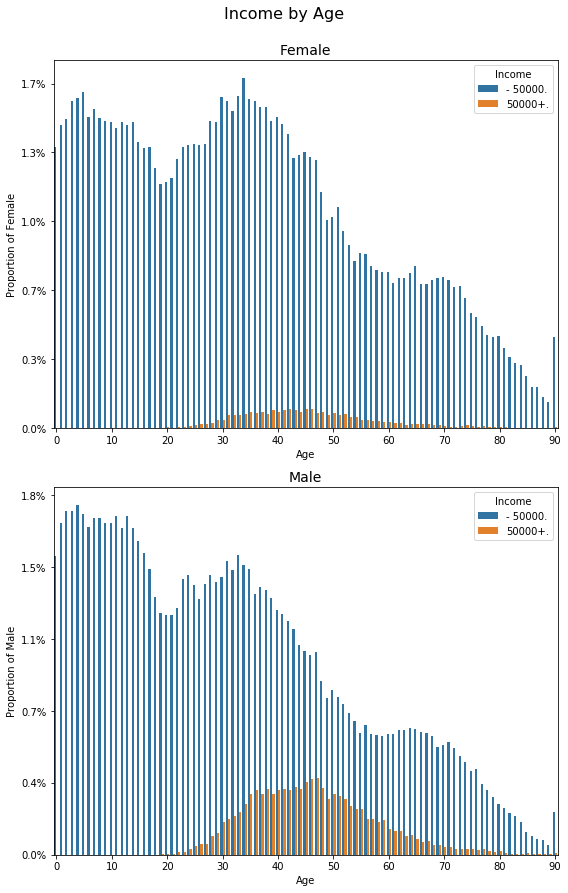

In [13]:
fig, ax =plt.subplots(2,1, figsize = (8, 12))
# fig = plt.figure(figsize = (10,13));

# Initiate plot
sns.countplot(x = 0, hue = 41, data = data[data[12]=='Female'], saturation=0.75, ax=ax[0])
sns.countplot(x = 0, hue = 41, data = data[data[12]=='Male'], saturation=0.75, ax=ax[1])

# Add titles
ax[0].set_title('Female', loc='center', fontsize = 14)
ax[1].set_title('Male', loc='center', fontsize = 14)

# Add labels
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[0].set_ylabel("Proportion of Female")
ax[1].set_ylabel("Proportion of Male")

# Add x_axis ticks
new_ticks = [i.get_text() for i in ax[0].get_xticklabels()]
ax[0].set_xticks(range(0, len(new_ticks), 10))
ax[0].set_xticklabels(new_ticks[::10])
ax[1].set_xticks(range(0, len(new_ticks), 10))
ax[1].set_xticklabels(new_ticks[::10])

# Optimize y_axis ticks
total_F = data[data[12]=='Female'].shape[0]*1.
total_M = data[data[12]=='Male'].shape[0]*1.
ax[0].set_yticklabels(map('{:.1f}%'.format, 100*ax[0].yaxis.get_majorticklocs()/total_F))
ax[1].set_yticklabels(map('{:.1f}%'.format, 100*ax[1].yaxis.get_majorticklocs()/total_M))

# Change legend location
ax[0].legend(loc=1, title='Income')
ax[1].legend(loc=1, title='Income')

# Set suptitle
fig.suptitle("Income by Age", fontsize = 16, y = 1.03)

fig.tight_layout()
fig.show()

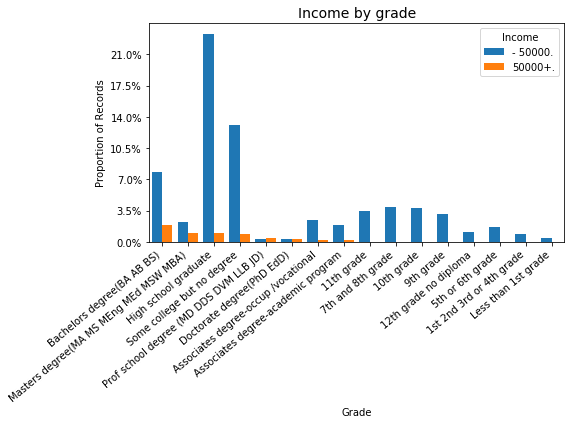

In [14]:
# Use occupation percentage of '>50K' as order of the plot
order = (data[4][data[41]=='50000+.'].value_counts()/data.shape[0]).index

# Plotting the income by age
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 4, hue = 41, order = order, data = data, saturation=1)
ax.set_title('Income by grade', fontsize = 14)
ax.set_xlabel("Grade")
ax.set_ylabel("Proportion of Records")

# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = data.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.legend(loc=1, title='Income')

plt.tight_layout()
plt.show()

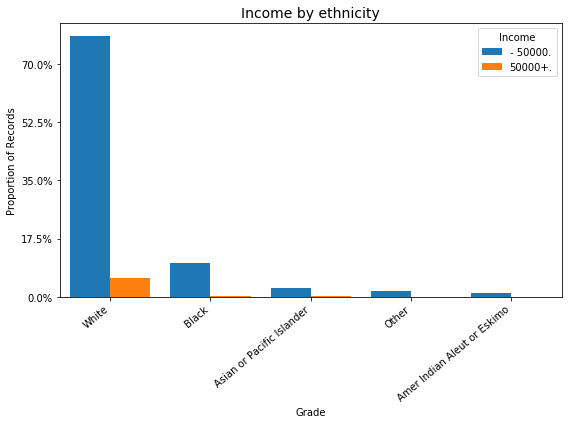

In [15]:
# Use occupation percentage of '>50K' as order of the plot
order = (data[10][data[41]=='50000+.'].value_counts()/data.shape[0]).index

# Plotting the income by age
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 10, hue = 41, order = order, data = data, saturation=1)
ax.set_title('Income by ethnicity', fontsize = 14)
ax.set_xlabel("Grade")
ax.set_ylabel("Proportion of Records")

# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = data.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.legend(loc=1, title='Income')

plt.tight_layout()
plt.show()

# Data pre-processing

In [16]:
a =train[41].unique()
Y_train = train[41]==a[1]
Y_test = test[41]==a[1]

In [17]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()

for col in train.columns:
    if train[col].dtype.name == 'int64' or train[col].dtype.name == 'float64' :
        col_train = pd.DataFrame({col : train[col]})
        col_test = pd.DataFrame({col : test[col]})
    elif train[col].dtype.name == 'object':
        col_train = pd.get_dummies(train[col], prefix=str(col))
        col_test = pd.get_dummies(test[col], prefix=str(col))
    if len(col_train.columns) != len(col_test.columns):
            for newc in col_train:
                if newc not in col_test.columns:
                    col_test[newc] = 0
    X_train = pd.concat([X_train, col_train], axis=1)
    X_test = pd.concat([X_test, col_test], axis=1)

# Machine learning

Training model Logistic Regression...
Training Logistic Regression on 0.05% of the dataset
sample size = 95
trained on 0.007283926010131836 seconds
Accuracy Logistic Regression on 0.05% of the dataset:
acc_train =  1.0
acc_test =  0.950232807458247
fbeta score train =  0
fbeta score test =  0
Area under ROC curve: 0.7658093821487251


Training Logistic Regression on 0.1% of the dataset
sample size = 190
trained on 0.011542797088623047 seconds
Accuracy Logistic Regression on 0.1% of the dataset:
acc_train =  0.9736842105263158
acc_test =  0.93661120628948
fbeta score train =  1.0
fbeta score test =  0.5477817104288419
Area under ROC curve: 0.8581372435418599


Training Logistic Regression on 0.2% of the dataset
sample size = 380
trained on 0.01884770393371582 seconds
Accuracy Logistic Regression on 0.2% of the dataset:
acc_train =  0.968421052631579
acc_test =  0.9413093974333372
fbeta score train =  0.7575757575757576
fbeta score test =  0.4170606678942916
Area under ROC curve: 0.94243

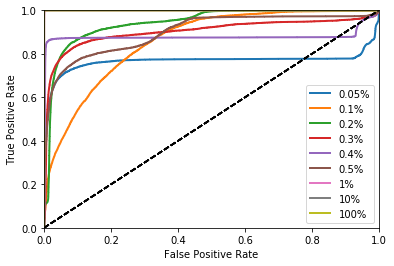



Training model Random Forest...
Training Random Forest on 0.05% of the dataset
sample size = 95
trained on 0.5031397342681885 seconds
Accuracy Random Forest on 0.05% of the dataset:
acc_train =  0.9473684210526315
acc_test =  0.9389024941403992
fbeta score train =  0
fbeta score test =  0
Training Random Forest on 0.1% of the dataset
sample size = 190
trained on 0.974895715713501 seconds
Accuracy Random Forest on 0.1% of the dataset:
acc_train =  0.9526315789473684
acc_test =  0.9389024941403992
fbeta score train =  0
fbeta score test =  0
Training Random Forest on 0.2% of the dataset
sample size = 380
trained on 1.4477119445800781 seconds
Accuracy Random Forest on 0.2% of the dataset:
acc_train =  0.9605263157894737
acc_test =  0.9389024941403992
fbeta score train =  0
fbeta score test =  0
Training Random Forest on 0.3% of the dataset
sample size = 571
trained on 1.9443938732147217 seconds
Accuracy Random Forest on 0.3% of the dataset:
acc_train =  0.9509632224168126
acc_test =  0.

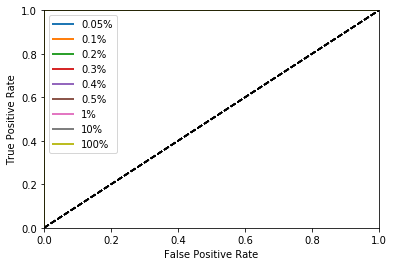



Training model Linear SVM...
Training Linear SVM on 0.05% of the dataset
sample size = 95
trained on 0.006658077239990234 seconds
Accuracy Linear SVM on 0.05% of the dataset:
acc_train =  0.9789473684210527
acc_test =  0.9424445308640678
fbeta score train =  0
fbeta score test =  0
Area under ROC curve: 0.8185497927313276


Training Linear SVM on 0.1% of the dataset
sample size = 190
trained on 0.010665178298950195 seconds
Accuracy Linear SVM on 0.1% of the dataset:
acc_train =  0.9736842105263158
acc_test =  0.9375781718045468
fbeta score train =  0.8823529411764706
fbeta score test =  0.32815657908733115
Area under ROC curve: 0.8605532760859852


Training Linear SVM on 0.2% of the dataset
sample size = 380
trained on 0.02216815948486328 seconds
Accuracy Linear SVM on 0.2% of the dataset:
acc_train =  0.9631578947368421
acc_test =  0.9423078944325909
fbeta score train =  0.7575757575757576
fbeta score test =  0.4212047695245961
Area under ROC curve: 0.9645562664843921


Training Lin

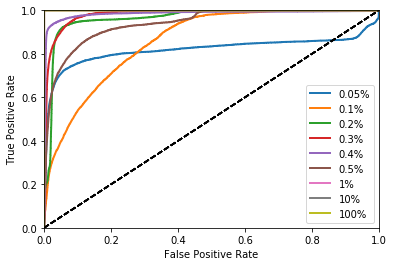

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif, chi2
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score

# function to plot roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

def trainer(model,name,samples,X_train = X_train, Y_train = Y_train, X_test=X_test, Y_test=Y_test):
    results = np.zeros((5,len(samples)))
    pre_sample_size = 0
    time = 0
    fbeta_train = 0
    fbeta_test = 0
    list_time =[]
    list_acc = []
    list_fbeta =[]
    print('Training model {}...'.format(name))
    for i in range(0,len(samples)):
        print('Training {} on {}% of the dataset'.format(name,samples[i]))
        sample_size = int(len(X_train)*samples[i]/100)
        print('sample size =',sample_size)
        start = t.time() 
        model.fit(X_train[pre_sample_size:sample_size], Y_train[pre_sample_size:sample_size])
        end = t.time()
        time += end-start
        list_time.append(time)
        print('trained on {} seconds'.format(time))
        # make predictions on the sample of the training dataset
        Y_train_pred = model.predict(X_train[:sample_size])
        # make predictions on the testing dataset
        Y_test_pred = model.predict(X_test)
        # evaluate accuracy of training predictions
        acc_train = accuracy_score(Y_train[:sample_size],Y_train_pred)
        # evaluate accuracy of testing predictions
        acc_test = accuracy_score(Y_test,Y_test_pred)
        list_acc.append(acc_test)
        print('Accuracy {} on {}% of the dataset:'.format(name,samples[i]))
        print('acc_train = ',acc_train)
        print('acc_test = ',acc_test)
        print('fbeta score train = ',fbeta_train)
        print('fbeta score test = ',fbeta_test)
        # Compute the roc curve
        if name!='Random Forest':
            # Compute F-score
            fbeta_train = fbeta_score(Y_train[:sample_size], Y_train_pred, average = 'binary', beta = 0.5)
            # Compute F-score on the test set which is y_test
            fbeta_test = fbeta_score(Y_test, Y_test_pred, average = 'binary', beta = 0.5)
            y_scores = model.decision_function(X_test)
            fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
            # ROC curve
            plot_roc_curve(fpr, tpr, label='{}%'.format(samples[i]))
            # AUC score
            auc = roc_auc_score(Y_test, y_scores)
            print("Area under ROC curve:",auc)
            print('\n')
        list_fbeta.append(fbeta_test)
        results[0,i] = acc_train
        results[1,i] = acc_test
        results[2,i] = fbeta_train
        results[3,i] = fbeta_test
        results[4,i] = time
        pre_sample_size = sample_size
    if name!='Random Forest':
        plt.legend()
        plt.show()
    print('\n')
    return (list_time,list_acc,list_fbeta)

names = ["Logistic Regression", "Random Forest",  "AdaBoost",  
         "Linear SVM"]

logReg = LogisticRegression(solver='liblinear')
linsvm = LinearSVC(dual=False, C=0.025)
randforest = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, n_jobs=-1)
adaBoost = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()
quadlda = QuadraticDiscriminantAnalysis()

models = [logReg,randforest,adaBoost,linsvm]

scores = []
samples = [0.05,0.1,0.2,0.3,0.4,0.5,1,10,100]
results = {}
for name, model in zip(names, models):
    results[name] = trainer(model,name,samples)

# Results

/Users/alexisderusse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alexisderusse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


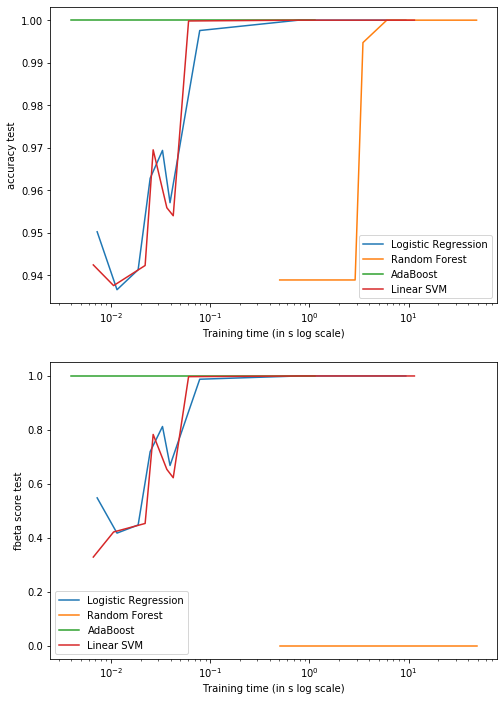

In [19]:
fig, ax =plt.subplots(2,1, figsize = (8, 12))
for name in names:
    plt.subplot(2,1,1)
    plt.plot(results[name][0],results[name][1], label = name)
    plt.xlabel('Training time (in s log scale)')
    plt.ylabel('accuracy test')
    plt.xscale('log')
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(results[name][0],results[name][2], label = name)
    plt.xlabel('Training time (in s log scale)')
    plt.ylabel('fbeta score test')
    plt.xscale('log')
    plt.legend()
plt.show()

AdaBoost is the faster model giving 100% accuracy and fbeta score. This seems weird... There is maybe some overfitting.
I should try to see if the test set is included into the train set.